# Hyper-Parameters Tuning

### 1. Introduction
### 2. GridSearchCV
### 3. RandomizedSearchCV
### 4. Bayesian Optimisation

## 1. Introduction
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. A typical example is $C$, $kernel$ and $gamma$ for Support Vector Machine Classifier.

<b>It is possible and recommended to search the hyper-parameter space for the best $cross$ $validation$ $score$.</b>

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

A search consists of:

- an estimator (regressor or classifier such as sklearn.svm.SVC());

- a parameter space;

- a method for searching or sampling candidates;

- a cross-validation scheme; and

- a score function.

Two generic approaches to sampling search candidates are provided in scikit-learn:
- for given values, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV'>GridSearchCV</a> exhaustively considers all parameter combinations; [a real example: 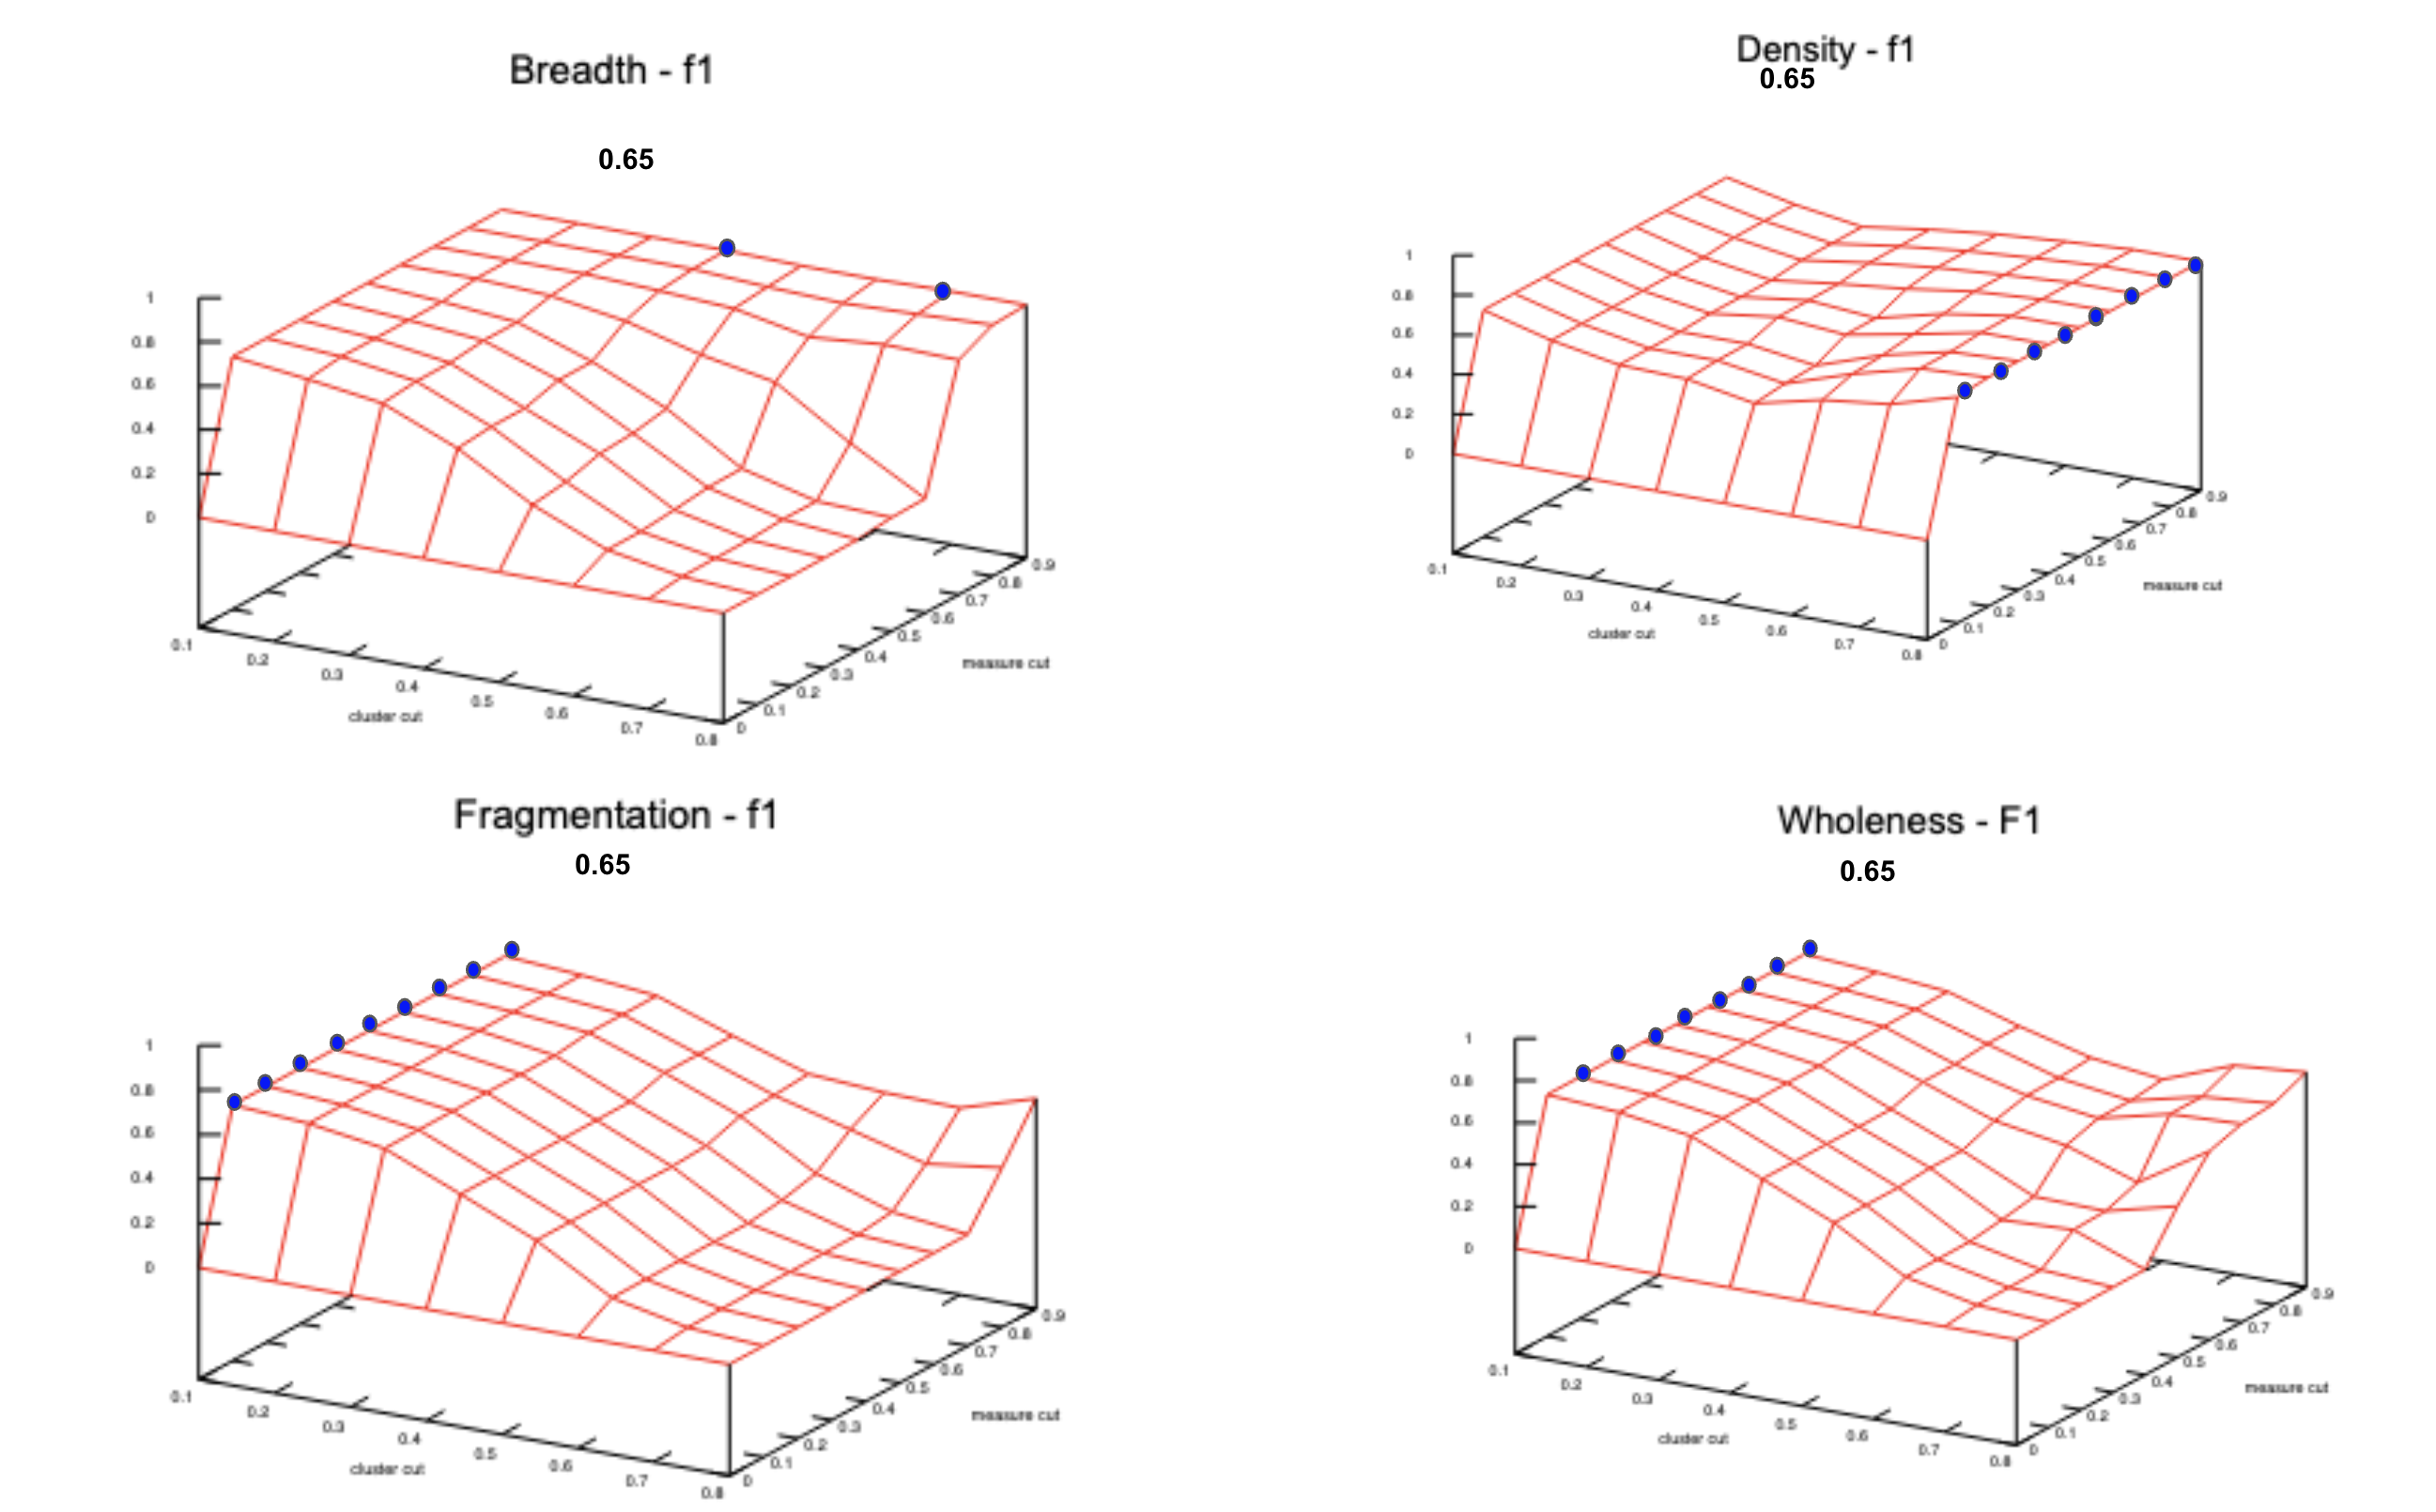

where 4 systems (two parameters) one score (F1) and each point is estimated on a development set of samples with cross validation.]

- <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV'>RandomizedSearchCV</a> can sample a given number of candidates from a parameter space with a specified distribution.



Note that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. It is recommended to read the docstring of the estimator class to get a finer understanding of their expected behavior, possibly by reading the enclosed reference to the literature.

## 2. GridSearchCV
The grid search provided by <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV'>GridSearchCV</a> exhaustively generates candidates from a grid of parameter values specified with the <b>param_grid</b> parameter. 

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Load the digits dataset (MNIST)
digits = datasets.load_digits()

# To apply a classifier on this data, we need to flatten the
# image. So, turn the data in a (samples, features) matrix
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.5, random_state=0)

# Set the parameters by cross-validation
tuned_params = [
    {
      'kernel': ['rbf'],
      'gamma': [1e-3, 1e-4],
      'C': [1,10,100,1000]
    },
    {
      'kernel': ['linear'],
      'C': [1,10,100,1000]
    }
]

scores = ['precision','recall']

for score in scores:
  print(f'Tuning hyperparameters for {score}')

  clf = GridSearchCV(
      SVC(), tuned_params, scoring=f'{score}_macro'
  )
  clf.fit(X_train, y_train)

  print("Best parameters found:")
  print(clf.best_params_)
  print("Grid scores:")

  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std*2, params))

  print("Detailed classification report:")
  y_true, y_pred = y_test, clf.predict(X_test)
  print(classification_report(y_true, y_pred))

Tuning hyperparameters for precision
Best parameters found:
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Grid scores:
0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}
Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1     

## RandomSearchCV

While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favourable properties. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV'>RandomizedSearchCV</a> implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

- A budget can be chosen independent of the number of parameters and possible values.

- Adding parameters that do not influence the performance does not decrease efficiency.

Specifying how parameters should be sampled is done using a dictionary, very similar to specifying parameters for GridSearchCV. For each parameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
  print(f"Tuning hyper-parameters for {score}")
  print()

  clf = RandomizedSearchCV(
      SVC(), tuned_parameters, scoring=f'{score}_macro'
  )
  clf.fit(X_train, y_train)

  print("Best parameters set found:")
  print()
  print(clf.best_params_)
  print()
  print("Scores:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
      print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
  print()

  print("Detailed classification report:")
  print()
  y_true, y_pred = y_test, clf.predict(X_test)
  print(classification_report(y_true, y_pred))
  print()

Automatically created module for IPython interactive environment
Tuning hyper-parameters for precision

Best parameters set found:

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}

Scores:

0.974 (+/-0.012) for {'kernel': 'linear', 'C': 1}
0.974 (+/-0.012) for {'kernel': 'linear', 'C': 10}
0.983 (+/-0.026) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}
0.974 (+/-0.012) for {'kernel': 'linear', 'C': 100}
0.988 (+/-0.017) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
0.986 (+/-0.016) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}
0.974 (+/-0.012) for {'kernel': 'linear', 'C': 1000}
0.959 (+/-0.028) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}
0.983 (+/-0.026) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}
0.982 (+/-0.026) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}

Detailed classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       

## Bayesian Optimisation

Grid search is one hyperparameters tuning algorithm where we try all possible combinations of hyperparameters. Trying all possible combinations of hyperparameters can take a lot of time (sometimes even days if there is a lot of data) even on powerful computers.

We need an algorithm that tries combinations that are giving good results only.

To explain with a simple example, let's consider the below image where there are two hyperparameters to tune (C and Gamma). Accuracy is displayed on left as a color bar.

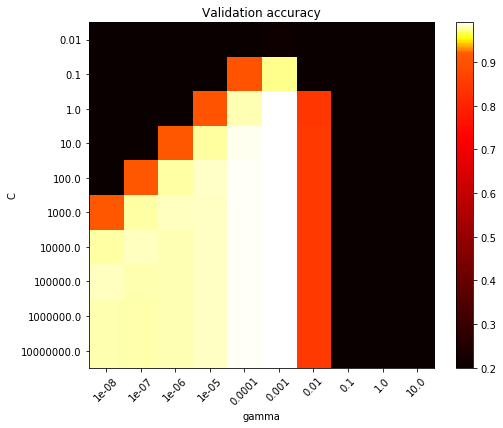

Grid search tries all combinations (Black, yellow and white area). We want an algorithm that tries few combinations from black area and deduces that they can't give good results and hence does not try more combinations from it. It'll only try combinations from white and yellow area then.

This will save us a lot of time with lots of hyperparameters.

In [2]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 15.4 MB/s 
     |████████████████████████████████| 209 kB 61.1 MB/s 
     |████████████████████████████████| 81 kB 10.7 MB/s 
     |████████████████████████████████| 78 kB 8.9 MB/s 
     |████████████████████████████████| 147 kB 77.7 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 112 kB 73.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=62c07c0f933e167ddd3109cae3386d1744295cb8e8cc3e334125358d9d7de393
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


### Optuna strategies for Hyperparameters Optimisation

Optuna overall uses the below strategy for finding the best hyperparameters combination:


*   *Sampling Strategy* - It uses a sampling algorithm for selecting the best hyperparameters combination from a list of all possible combinations. It concentrates on areas where hyperparameters are giving good results and ignores others resulting in time savings.
*   *Pruning Strategy* - It uses a pruning strategy that constantly checks for algorithm performance during training and prunes (terminates) training for particular hyperparameters combination if it's not giving good results. This also results in time-saving. 


### Steps to use in Optuna

Below we have listed steps that will be commonly followed to perform hyperparameters tuning using optuna.


1.   Create an **objective function**.


> * This function will have logic for creating a model, training it, and evaluating it on the validation dataset. After evaluation, it should return a single value which is generally the output of the evaluation metric or loss function (accuracy, MSE, MAE, log loss, etc.) and needs to be **minimized** / **maximized**.
> * This function takes as input a single parameter which is an instance of **Trial** class. Trial object has details about one combination of hyperparameters with which the ML algorithm will be executed.


2.   Create **Study** object

3. Call optimize() method on Study by giving objective function created in the first step to find best hyperparameters combination.

> * It'll execute the objective function more than once by giving different **Trial** instances each having different hyperparameters combinations.

### Hyperparameter Tuning of Ridge Regression Model (simple)

As a part of this section, we'll explain how we can use optuna with scikit-learn estimators. We'll be working on a regression problem and try to solve it using ridge regression.

We'll be using the Boston housing dataset available from scikit-learn for our purpose.

We'll also compare the results of optuna with results of grid search and random search of scikit-learn.

Below, we have imported all necessary Python libraries and functions that we'll be using throughout this section.

In [3]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

import warnings

import optuna
from optuna.visualization import plot_contour, plot_edf, plot_optimization_history,\
  plot_parallel_coordinate, plot_param_importances, plot_slice  


warnings.filterwarnings("ignore")

#### Load the Boston Housing dataset

Below we have loaded the Boston housing dataset available from scikit-learn. It has information about houses like the average number of rooms per dwelling, property tax, the crime rate in the area, etc. We'll be predicting the median value of the house in 1000 dollars. We have loaded the dataset and saved it in a data frame for display purposes.

We have stored 13 features of data into variable **X** and target value in variable **Y**.

In [ ]:
boston = datasets.load_boston()

X,Y = boston.data, boston.target

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df["HousePrice"] = boston.target

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80,
                                                    random_state=123)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 13), (102, 13), (404,), (102,))

#### Define the objective function

Below we have declared the objective function that we'll be using for our purpose. We have declared 4 hyperparameters that we'll be optimizing.

**Hyperparameters to Tune**:
1. alpha
2. fit_intercept
3. tol
4. solver


We can use `suggest_float()` to suggest floating-point values for hyperparameters alpha and tol. We can use `suggest_categorical()` to suggest categorical values for hyperparameters *fit_intercept* and solver. Values of hyperparameters will be selected from ranges suggested by these methods during each trial of the optuna study.

We can then create a model with these parameters and fitted training data to it. At last, we have calculated the mean squared error (MSE) on test data and returned the value of it. We'll be minimizing this MSE during the study.


In [ ]:
def objective(trial):
  alpha = trial.suggest_float("alpha", 0, 10)
  intercept = trial.suggest_categorical("fit_intercept", [True, False])
  tol = trial.suggest_float("tol", 0.001, 0.01, log=True)

  solver = trial.suggest_categorical(
      "solver",
      ["auto","svd","cholesky","lsqr","saga","sag"]
  )

  # Create the model
  regressor = Ridge(
      alpha=alpha,
      fit_intercept=intercept,
      tol=tol,
      solver=solver
  )

  # Fit the model
  regressor.fit(X_train, Y_train)

  return mean_squared_error(Y_test, regressor.predict(X_test))

#### Create the Study object and perform optimisation

We can create an instance of `Study` and run 15 trials of the objective function that we created in the previous cell. This will try to find the best hyperparameter settings that minimize MSE on test data using TPESampler of optuna.

We can record the execution time taken by below cell using Jupyter notebook magic command `%%time`.

In [ ]:
%%time


study = optuna.create_study(study_name="RidgeRegression")
study.optimize(objective, n_trials=15)

[I 2022-12-11 10:26:57,068] A new study created in memory with name: RidgeRegression
[I 2022-12-11 10:26:57,093] Trial 0 finished with value: 34.21901342190263 and parameters: {'alpha': 9.1124959732543, 'fit_intercept': True, 'tol': 0.0038462561092926922, 'solver': 'saga'}. Best is trial 0 with value: 34.21901342190263.
[I 2022-12-11 10:26:57,112] Trial 1 finished with value: 51.749682060788494 and parameters: {'alpha': 3.2917691222025356, 'fit_intercept': False, 'tol': 0.007336559758915425, 'solver': 'saga'}. Best is trial 0 with value: 34.21901342190263.
[I 2022-12-11 10:26:57,375] Trial 2 finished with value: 38.182287352227874 and parameters: {'alpha': 7.461245658204227, 'fit_intercept': False, 'tol': 0.0010219028857759778, 'solver': 'sag'}. Best is trial 0 with value: 34.21901342190263.
[I 2022-12-11 10:26:57,480] Trial 3 finished with value: 29.184806455940414 and parameters: {'alpha': 7.055278470032341, 'fit_intercept': True, 'tol': 0.0016428261072052451, 'solver': 'sag'}. Best 

CPU times: user 379 ms, sys: 6.09 ms, total: 385 ms
Wall time: 688 ms


In [ ]:
print("Best Params : {}".format(study.best_params))

print("\nBest MSE : {}".format(study.best_value))

Best Params : {'alpha': 5.7752936762039555, 'fit_intercept': True, 'tol': 0.0016241033547547135, 'solver': 'sag'}

Best MSE : 29.172621944687418


In [ ]:
ridge = Ridge(**study.best_params)

ridge.fit(X_train, Y_train)

print("Ridge Regression MSE on Train Dataset : {}".format(mean_squared_error(Y_train, ridge.predict(X_train))))
print("Ridge Regression MSE on Test  Dataset : {}".format(mean_squared_error(Y_test, ridge.predict(X_test))))

Ridge Regression MSE on Train Dataset : 24.671301009662344
Ridge Regression MSE on Test  Dataset : 29.170051904243444


We can create a ridge regression model with default parameters for comparison purposes. We have a default model with train data and then evaluated it on both train and test sets.

In [ ]:
ridge = Ridge()

ridge.fit(X_train, Y_train)

print("Ridge Regression MSE on Train Dataset : {}".format(mean_squared_error(Y_train, ridge.predict(X_train))))
print("Ridge Regression MSE on Test  Dataset : {}".format(mean_squared_error(Y_test, ridge.predict(X_test))))

Ridge Regression MSE on Train Dataset : 20.82386585083267
Ridge Regression MSE on Test  Dataset : 28.932169896813704


#### Optimise more

Now we'll optimize the objective function again for 10 trials to check whether it's improving results further or not.

This trial will work keeping 15 trials that we performed earlier as a part of this study. It'll continue to search in a direction where it had got good results (least MSE) when it ran 15 trials earlier.

In [ ]:
%%time

study.optimize(objective, n_trials=10)

[I 2022-12-11 10:27:52,347] Trial 15 finished with value: 29.067358137276578 and parameters: {'alpha': 8.770953394014601, 'fit_intercept': True, 'tol': 0.0013389061893790476, 'solver': 'sag'}. Best is trial 15 with value: 29.067358137276578.
[I 2022-12-11 10:27:52,360] Trial 16 finished with value: 29.789631362076005 and parameters: {'alpha': 8.868772252305998, 'fit_intercept': True, 'tol': 0.0013267199727295936, 'solver': 'cholesky'}. Best is trial 15 with value: 29.067358137276578.
[I 2022-12-11 10:27:52,376] Trial 17 finished with value: 34.999497033870014 and parameters: {'alpha': 3.593476148535661, 'fit_intercept': True, 'tol': 0.004658357035998238, 'solver': 'lsqr'}. Best is trial 15 with value: 29.067358137276578.
[I 2022-12-11 10:27:52,387] Trial 18 finished with value: 32.636051533974936 and parameters: {'alpha': 1.5543930797704024, 'fit_intercept': False, 'tol': 0.0025838664240633927, 'solver': 'auto'}. Best is trial 15 with value: 29.067358137276578.
[I 2022-12-11 10:27:52,4

CPU times: user 454 ms, sys: 5.97 ms, total: 460 ms
Wall time: 600 ms


In [ ]:
print("Best Params : {}".format(study.best_params))

print("\nBest MSE : {}".format(study.best_value))

Best Params : {'alpha': 9.782863893720307, 'fit_intercept': True, 'tol': 0.0012058428689025636, 'solver': 'sag'}

Best MSE : 29.028417002708252


In [ ]:
ridge = Ridge(**study.best_params)

ridge.fit(X_train, Y_train)

print("Ridge Regression MSE on Train Dataset : {}".format(mean_squared_error(Y_train, ridge.predict(X_train))))
print("Ridge Regression MSE on Test  Dataset : {}".format(mean_squared_error(Y_test, ridge.predict(X_test))))

Ridge Regression MSE on Train Dataset : 24.165019311606773
Ridge Regression MSE on Test  Dataset : 29.026672537046615


In [ ]:
plot_optimization_history(study)

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
plot_contour(study)

In [ ]:
plot_slice(study)

In [ ]:
plot_param_importances(study)

In [ ]:
plot_edf(study)

## Pruning searches

We'll explain how we can instruct Optuna to prune trials that are not performing well during the study process earlier.

We'll be using the California housing dataset available from scikit-learn as a part of this section. We'll be training a dataset in batches on a multi-layer perceptron algorithm available from scikit-learn.

**Why prune trials?**

Typical machine learning algorithm deals with a lot of data in which case training does not complete in one go.

Real-world problems generally have a lot of data and the training process consists of going through batches of samples of data. It goes through the total data in batches to cover the total dataset.

Many neural networks even go through a dataset more than once during the training process.

When going through data in batches or even looping through the same data more than once during the particular trial of study, we can check the performance of a model on set aside validation or test set.

If it's not performing well then it can be pruned before it completes to save time and resources for other trials of the study process. Whether to prune a particular trial or not is decided by the internal pruning algorithm of Optuna.

### Load California Housing Dataset

California housing dataset has information about houses (average bedrooms, the population of an area, house age, etc) in California and their median house price. The median house price will be the target variable that our ML algorithm will be predicting. It'll be a regression problem.

Below we have loaded the California housing dataset which is available from scikit-learn. It's a big dataset compared to our previous datasets. It has around 20k+ entries.

We have stored the dataset in a pandas dataframe for display purposes. We have stored housing features in variable X and our target variable (median house price) in variable Y.

In [ ]:
calif_housing = datasets.fetch_california_housing()

X, Y = calif_housing.data, calif_housing.target

calif_housing_df = pd.DataFrame(calif_housing.data, columns=calif_housing.feature_names)

calif_housing_df["MedianHousePrice"] = calif_housing.target

calif_housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.90, random_state=123)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

In [ ]:
X_train_batched, Y_train_batched = X_train.reshape(-1,16,8), Y_train.reshape(-1,16)

X_train_batched.shape, Y_train_batched.shape

((1161, 16, 8), (1161, 16))

### Define the objective function

Hyperparameters to tune:
1. hidden_layer_size
2. activation
3. learning_rate
4. learning_rate_init


**How to prune under performing trial?**
In order to prune underperforming trials, we have introduced few extra lines of code.

We are calling `report()` method of `Trial` instance which takes as input value which we are optimizing and number inside of our training loop.

Then we have put if condition which checks whether this particular trial should be pruned using `should_prune()` method of Trial instance.

If this method returns True then we raise `TrialPruned()` which will raise an exception. This will inform Study instance that we should prune this trial and should not train it more.

This will result in saving of time and resources which would have been wasted behind this trial which would have resulted in underperformed results.

The default pruning algorithm of the study instance is `MedianPruner` which decides whether to prune a particular trial or not.

Based on the decision taken by this algorithm, `should_prune()` method returns True or False.

The `MedianPruner` algorithm takes decisions based on MSE values that we reported through various calls of `report()` method during the training process.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):

  hidden_layers = trial.suggest_categorical(
      "hidden_layer_sizes",
      [
        (50,100),
        (100,100),
        (50,75,100),
        (25,50,75,100)
      ]
  )

  activation = trial.suggest_categorical(
      "activation",
      ["relu", "identity"]
  )

  learning_rate = trial.suggest_categorical(
      "learning_rate",
      ["constant","invscaling","adaptive"]
  )

  learning_rate_init = trial.suggest_float(
      "learning_rate_init", 0.001, 0.01
  )

  mlp_regressor = MLPRegressor(
      hidden_layer_sizes=hidden_layers,
      activation=activation,
      learning_rate=learning_rate,
      learning_rate_init=learning_rate_init
  )

  # Fit the model
  for i, (X_batch, Y_batch) in enumerate(zip(X_train_batched, Y_train_batched)):

    mlp_regressor.partial_fit(X_batch, Y_batch)

    mse = mean_squared_error(Y_test, mlp_regressor.predict(X_test))

    trial.report(mse, i+1)

    if trial.should_prune():
      raise optuna.TrialPruned()

  return mse

In [ ]:
%%time

study = optuna.create_study(study_name="MLPRegressor")
study.optimize(objective, n_trials=20)

[I 2022-12-11 10:39:38,606] A new study created in memory with name: MLPRegressor
[I 2022-12-11 10:39:45,935] Trial 0 finished with value: 1.9319155934716423 and parameters: {'hidden_layer_sizes': (50, 75, 100), 'activation': 'identity', 'learning_rate': 'adaptive', 'learning_rate_init': 0.006340376194146824}. Best is trial 0 with value: 1.9319155934716423.
[I 2022-12-11 10:39:51,559] Trial 1 finished with value: 25.316970552286072 and parameters: {'hidden_layer_sizes': (50, 75, 100), 'activation': 'identity', 'learning_rate': 'adaptive', 'learning_rate_init': 0.00282456623200247}. Best is trial 0 with value: 1.9319155934716423.
[I 2022-12-11 10:39:56,322] Trial 2 finished with value: 26.421081566546878 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'identity', 'learning_rate': 'invscaling', 'learning_rate_init': 0.003010394692498637}. Best is trial 0 with value: 1.9319155934716423.
[I 2022-12-11 10:40:02,487] Trial 3 finished with value: 1.3901385292111224 and parame

CPU times: user 56.8 s, sys: 24.9 s, total: 1min 21s
Wall time: 43.2 s


In [ ]:
print("Best Params : {}".format(study.best_params))
print("\nBest MSE : {}".format(study.best_value))

Best Params : {'hidden_layer_sizes': (50, 75, 100), 'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.0037698017205740376}

Best MSE : 1.2013593642324025


We can print the count of total trials, trials that were pruned, and trials that were completed successfully. We have used the state of the trial to determine whether they completed or got pruned. We can notice that 13 trials were pruned out of a total of 20 trials.

In [ ]:
print("Total Trials : {}".format(len(study.trials)))
print("Finished Trials : {}".format(len([t for t in study.trials \
                                         if t.state == optuna.trial.TrialState.COMPLETE])))
print("Prunned Trials : {}".format(len([t for t in study.trials \
                                        if t.state == optuna.trial.TrialState.PRUNED])))

Total Trials : 20
Finished Trials : 7
Prunned Trials : 13


In [ ]:
mlp_regressor = MLPRegressor(**study.best_params, random_state=123)

mlp_regressor.fit(X_train, Y_train)

print("MLP Regression MSE on Train Dataset : {}"\
      .format(mean_squared_error(Y_train, mlp_regressor.predict(X_train))))
print("MLP Regression MSE on Test  Dataset : {}"\
      .format(mean_squared_error(Y_test, mlp_regressor.predict(X_test))))

MLP Regression MSE on Train Dataset : 0.6343276723714645
MLP Regression MSE on Test  Dataset : 0.6584092420678264


### Visualising the optimisation

In [ ]:
plot_optimization_history(study)

In [ ]:
plot_param_importances(study)

In [ ]:
plot_contour(study, params=["hidden_layer_sizes", "activation"],
             target_name="MSE of Median House Prices")

In [ ]:
plot_contour(study, params=["learning_rate", "learning_rate_init"],
             target_name="MSE of Median House Prices")

In [ ]:
plot_parallel_coordinate(study, target_name="MSE of Median House Prices")

In [ ]:
plot_slice(study, target_name="MSE of Median House Prices",
           params=["learning_rate","learning_rate_init"])

#### Plot intermediate values of trials

We'll introduce a chart that shows the progress of all trials on the study process.

This chart shows one line per trial showing how objective value is progressing (increasing/decreasing) during the training process of that trial.

This can be useful to analyze trial progress and why a particular set of trials were pruned. Optuna provides a method named `plot_intermediate_values()` for the creation of this chart.

The chart will have lines decreasing where we are trying to minimize objective value (MSE) and increasing where we are trying to maximize objective value (Accuracy) over time.

It'll have an entry for some trials till the end of the steps and for some till in between.

The reason behind some of the lines not running all steps of training is because they were deemed underperforming by Optuna and pruned before completion.

Below we have created an intermediate objective values chart of trials using Study object from the multi-layer perceptron section.

In [ ]:
from optuna.visualization import plot_intermediate_values

plot_intermediate_values(study)

#### Empirical distribution function plot

We'll introduce the empirical cumulative distribution function of objective value.

The chart consists of a single-step line.

The value on the X-axis represents an objective value that we are trying to minimize/maximize and Y-axis represents cumulative probability.

The cumulative probability at any point on the line represents the percentage of trials whose objective value is less than the objective value at that point.

To explain it with an example, let’s say we take a point on the line where cumulative probability is 0.80 and objective value is 2.7. Then of all trials that we tried as a part of the study process, 80% will have an objective value less than 2.7.

In [ ]:
plot_edf(study, target_name="MSE of Median House Prices")